In [1]:
import pandas as pd
from src.visualization.visualize import likert_plot, likert_plot_tab, group_comparison
from src.data import load_full_data
from src.exploration.explore import test_hypothesis, build_likelihood_ratio_test
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

In [2]:
full_data_df = load_full_data()
bike_data = {}
bike_data["ms"] = full_data_df[full_data_df["Experiment"] == "MS"].dropna(axis=1, how="all")
bike_data["ms"] = bike_data["ms"][bike_data["ms"]["Kamera"] == "P"]
bike_data["cp"] = full_data_df[full_data_df["Experiment"] == "CP"].dropna(axis=1, how="all")
bike_data["cp"] = bike_data["cp"][bike_data["cp"]["Kamera"] == "P"]
bike_data["se"] = full_data_df[full_data_df["Experiment"] == "SE"].dropna(axis=1, how="all")
bike_data["se"] = bike_data["se"][bike_data["se"]["Kamera"] == "P"]

# 2. Auswertung CP
Anmerkung zu Plots (von Tümer): test_hypothesis nutzt halt den Median. Der Plot ist etwas unpräzise, weil er nur die absoluten Werte (0,1,2,3) nimmt. Median von pandas nimmt aber, wenn man genau in der Mitte zwischen zwei Werten steht dann den Mittelwert aus den beiden. Deshalb gibt es in der Gruppe auch Werte wie 2.5. Das ist wichtig für das korrekte testen der Hypothesen. Wenn du jetzt die Balken vom Plot nimmst, fehlen halt die Zwischenwerte.
Deswegen gelten eher die Werte sicher Gruppe1/2 (sicher = safe+almost safe)

### a) Einflussfaktor "Breite RVA"
Gruppe1: schmale RVA <br>
Gruppe2: breite RVA

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

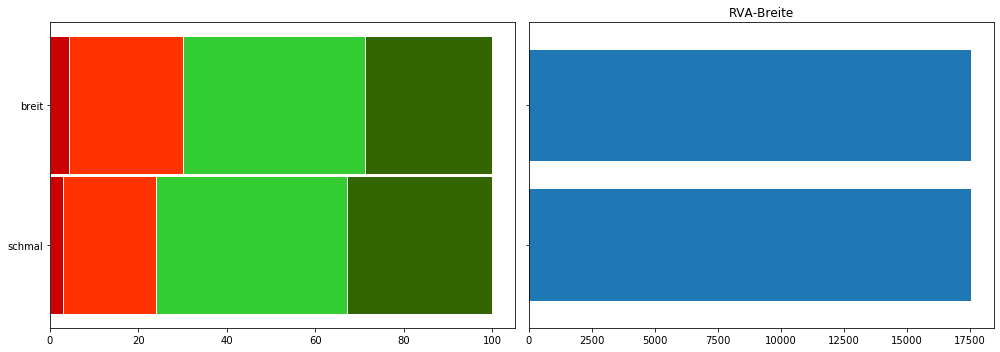

          unsafe  almost_unsafe  almost_safe       safe
group1  2.978530      21.023407    43.217154  32.780910
group2  4.261445      25.768200    41.100849  28.869506
Mittelwert von  schmal - 2.0580044421664105
Mittelwert von  breit - 1.9457841628185395
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) 5.767354956025331
Ist der Unterschied signifikant? True
sicher Gruppe 1  72.34466655276496 sicher Gruppe2 65.83433099595234


In [3]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "RVA-Breite", ["schmal", "breit"])
group_comparison(group1,group2)

### b) Einflussfaktor "Breite Gehweg"
Gruppe1: schmal <br>
Gruppe2: breit

Ergebnisse für Gesamtgruppe


c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:88: RuntimeWarning: invalid value encountered in true_divide
  unsafe_bars = np.array([group1[group1 == 0].shape[0], group2[group2 == 0].shape[0]])/totals * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:89: RuntimeWarning: invalid value encountered in true_divide
  unsafe_bars = unsafe_bars + np.array([group1[group1 == 0.5].shape[0], group2[group2 == 0.5].shape[0]])/(2* totals) * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:90: RuntimeWarning: invalid value encountered in true_divide
  almost_unsafe_bars = np.array([group1[group1 == 1].shape[0], group2[group2 == 1].shape[0]])/totals * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:91: RuntimeWarning: invalid value encountered in true_divide
  almost_unsafe_bars = almost_unsafe_bars + np.array([group1[group1 == 0.5].shape[0], group2[group2 == 0.5].shape[0]])/(2* totals) * 100
c:\users\nb\jupyt

<Figure size 432x288 with 0 Axes>

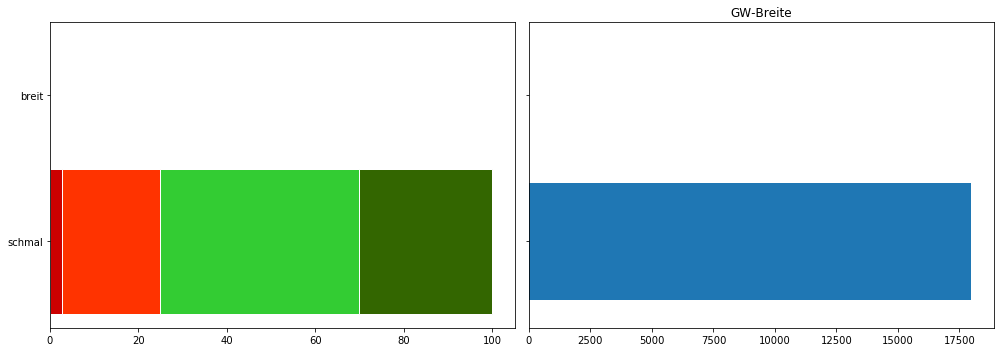

          unsafe  almost_unsafe  almost_safe      safe
group1  2.638016      22.260521    44.921332  30.18013
group2       NaN            NaN          NaN       NaN
Mittelwert von  schmal - 2.026435759159393
Mittelwert von  breit - nan


C:\Users\NB\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
C:\Users\NB\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Bootstrap Ergebnis: nan    (nan, nan)
Unterschied im Mittelwert von schmal zu breit (in Prozent) nan
Ist der Unterschied signifikant? False


C:\Users\NB\Anaconda3\lib\site-packages\bootstrapped\bootstrap.py:67: RuntimeWarning: invalid value encountered in sign
  return _np.sign(self.upper_bound) == _np.sign(self.lower_bound)


sicher Gruppe 1  74.34258075276588 sicher Gruppe2 0.0


In [4]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Breite"] == "schmal")] [["rating", "sessionID"]]
group2 = df[(df["GW-Breite"] == "breit")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Breite", ["schmal", "breit"])
group_comparison(group1,group2)

#### b1.1) Einflussfaktor "Breite Gehweg" <br>schmale RVA
Gruppe1: schmal <br>
Gruppe2: breit

Ergebnisse für Gesamtgruppe


c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:88: RuntimeWarning: invalid value encountered in true_divide
  unsafe_bars = np.array([group1[group1 == 0].shape[0], group2[group2 == 0].shape[0]])/totals * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:89: RuntimeWarning: invalid value encountered in true_divide
  unsafe_bars = unsafe_bars + np.array([group1[group1 == 0.5].shape[0], group2[group2 == 0.5].shape[0]])/(2* totals) * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:90: RuntimeWarning: invalid value encountered in true_divide
  almost_unsafe_bars = np.array([group1[group1 == 1].shape[0], group2[group2 == 1].shape[0]])/totals * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:91: RuntimeWarning: invalid value encountered in true_divide
  almost_unsafe_bars = almost_unsafe_bars + np.array([group1[group1 == 0.5].shape[0], group2[group2 == 0.5].shape[0]])/(2* totals) * 100
c:\users\nb\jupyt

<Figure size 432x288 with 0 Axes>

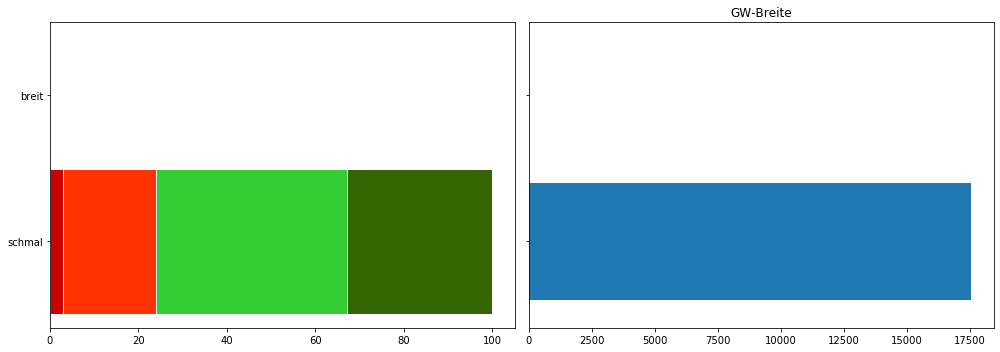

         unsafe  almost_unsafe  almost_safe      safe
group1  2.97853      21.023407    43.217154  32.78091
group2      NaN            NaN          NaN       NaN
Mittelwert von  schmal - 2.0580044421664105
Mittelwert von  breit - nan


C:\Users\NB\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
C:\Users\NB\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Bootstrap Ergebnis: nan    (nan, nan)
Unterschied im Mittelwert von schmal zu breit (in Prozent) nan
Ist der Unterschied signifikant? False


C:\Users\NB\Anaconda3\lib\site-packages\bootstrapped\bootstrap.py:67: RuntimeWarning: invalid value encountered in sign
  return _np.sign(self.upper_bound) == _np.sign(self.lower_bound)


sicher Gruppe 1  72.34466655276496 sicher Gruppe2 0.0


In [5]:
df = bike_data["cp"]
df = df[(df["RVA-Breite"] == 2)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Breite"] == "schmal")] [["rating", "sessionID"]]
group2 = df[(df["GW-Breite"] == "breit")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Breite", ["schmal", "breit"])
group_comparison(group1,group2)

#### b1.2) Einflussfaktor "Breite Gehweg" <br>breite RVA
Gruppe1: schmal <br>
Gruppe2: breit

Ergebnisse für Gesamtgruppe


c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:88: RuntimeWarning: invalid value encountered in true_divide
  unsafe_bars = np.array([group1[group1 == 0].shape[0], group2[group2 == 0].shape[0]])/totals * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:89: RuntimeWarning: invalid value encountered in true_divide
  unsafe_bars = unsafe_bars + np.array([group1[group1 == 0.5].shape[0], group2[group2 == 0.5].shape[0]])/(2* totals) * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:90: RuntimeWarning: invalid value encountered in true_divide
  almost_unsafe_bars = np.array([group1[group1 == 1].shape[0], group2[group2 == 1].shape[0]])/totals * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:91: RuntimeWarning: invalid value encountered in true_divide
  almost_unsafe_bars = almost_unsafe_bars + np.array([group1[group1 == 0.5].shape[0], group2[group2 == 0.5].shape[0]])/(2* totals) * 100
c:\users\nb\jupyt

<Figure size 432x288 with 0 Axes>

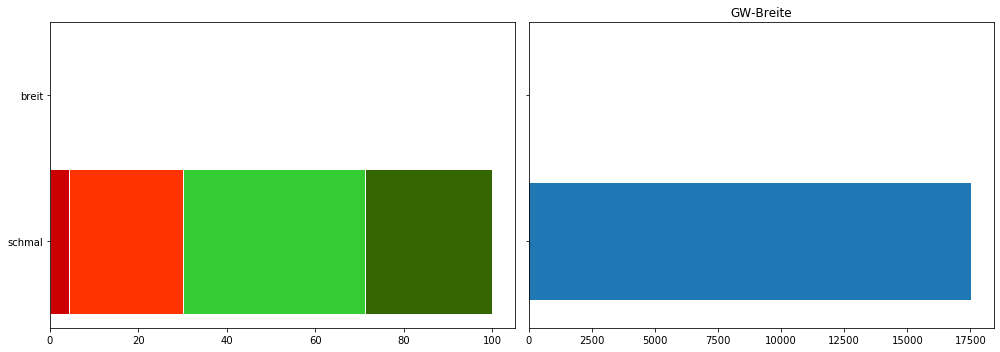

          unsafe  almost_unsafe  almost_safe       safe
group1  4.261445        25.7682    41.100849  28.869506
group2       NaN            NaN          NaN        NaN
Mittelwert von  schmal - 1.9457841628185395
Mittelwert von  breit - nan


C:\Users\NB\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
C:\Users\NB\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Bootstrap Ergebnis: nan    (nan, nan)
Unterschied im Mittelwert von schmal zu breit (in Prozent) nan
Ist der Unterschied signifikant? False
sicher Gruppe 1  65.83433099595234 sicher Gruppe2 0.0


C:\Users\NB\Anaconda3\lib\site-packages\bootstrapped\bootstrap.py:67: RuntimeWarning: invalid value encountered in sign
  return _np.sign(self.upper_bound) == _np.sign(self.lower_bound)


In [6]:
df = bike_data["cp"]
df = df[(df["RVA-Breite"] == 3.5)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Breite"] == "schmal")] [["rating", "sessionID"]]
group2 = df[(df["GW-Breite"] == "breit")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Breite", ["schmal", "breit"])
group_comparison(group1,group2)

#### b2) Einflussfaktor  "Breite Gehweg" <br> nur mit Auslage 
Gruppe1: schmaler Gehweg <br>
Gruppe2: breiter Gehweg

Ergebnisse für Gesamtgruppe


c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:88: RuntimeWarning: invalid value encountered in true_divide
  unsafe_bars = np.array([group1[group1 == 0].shape[0], group2[group2 == 0].shape[0]])/totals * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:89: RuntimeWarning: invalid value encountered in true_divide
  unsafe_bars = unsafe_bars + np.array([group1[group1 == 0.5].shape[0], group2[group2 == 0.5].shape[0]])/(2* totals) * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:90: RuntimeWarning: invalid value encountered in true_divide
  almost_unsafe_bars = np.array([group1[group1 == 1].shape[0], group2[group2 == 1].shape[0]])/totals * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:91: RuntimeWarning: invalid value encountered in true_divide
  almost_unsafe_bars = almost_unsafe_bars + np.array([group1[group1 == 0.5].shape[0], group2[group2 == 0.5].shape[0]])/(2* totals) * 100
c:\users\nb\jupyt

<Figure size 432x288 with 0 Axes>

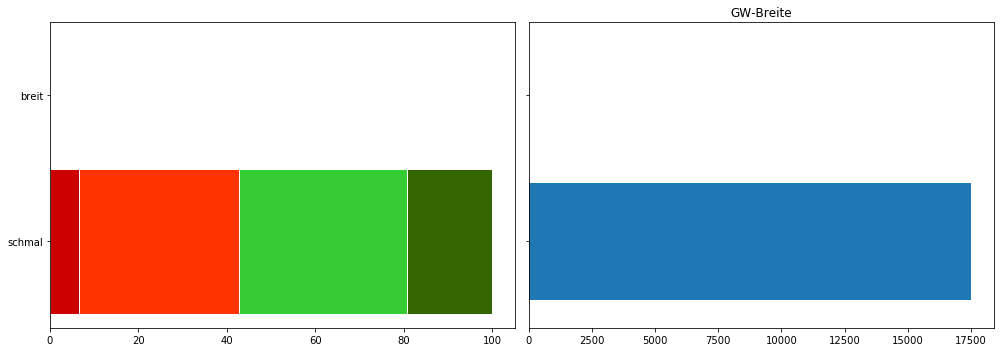

          unsafe  almost_unsafe  almost_safe       safe
group1  6.599897      36.123951    38.004337  19.271814
group2       NaN            NaN          NaN        NaN
Mittelwert von  schmal - 1.69948068253153
Mittelwert von  breit - nan


C:\Users\NB\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
C:\Users\NB\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Bootstrap Ergebnis: nan    (nan, nan)
Unterschied im Mittelwert von schmal zu breit (in Prozent) nan
Ist der Unterschied signifikant? False


C:\Users\NB\Anaconda3\lib\site-packages\bootstrapped\bootstrap.py:67: RuntimeWarning: invalid value encountered in sign
  return _np.sign(self.upper_bound) == _np.sign(self.lower_bound)


sicher Gruppe 1  53.24430748159562 sicher Gruppe2 0.0


In [7]:
df = bike_data["cp"]
df = df[(df["GW-Geschäftsnutzung"] == "ja")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Breite"] == "schmal")] [["rating", "sessionID"]]
group2 = df[(df["GW-Breite"] == "breit")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Breite", ["schmal", "breit"])
group_comparison(group1,group2)

### c) Einflussfaktor "Auslage / Fußgängeraufkommen"
Gruppe1: mit Auslagen <br>
Gruppe2: ohne Auslagen

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

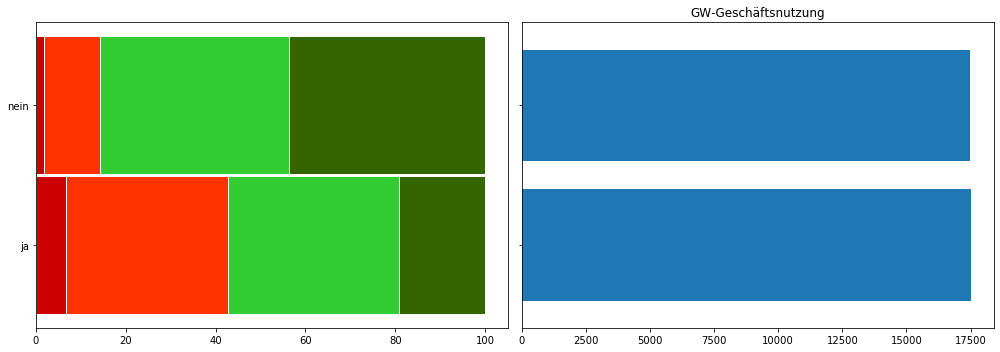

          unsafe  almost_unsafe  almost_safe       safe
group1  6.599897      36.123951    38.004337  19.271814
group2  1.740895      12.454977    42.070208  43.733920
Mittelwert von  ja - 1.69948068253153
Mittelwert von  nein - 2.2779715282145103
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -25.394998950509507
Ist der Unterschied signifikant? True
sicher Gruppe 1  53.24430748159562 sicher Gruppe2 83.36287233434338


In [8]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Geschäftsnutzung"] == "ja")] [["rating", "sessionID"]]
group2 = df[(df["GW-Geschäftsnutzung"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Geschäftsnutzung", ["ja", "nein"])
group_comparison(group1,group2)

#### c1) Einflussfaktor  "Auslage / Fußgängeraufkommen" <br> nur mit Gehweg
Gruppe1: mit Auslagen <br>
Gruppe2: ohne Auslagen

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

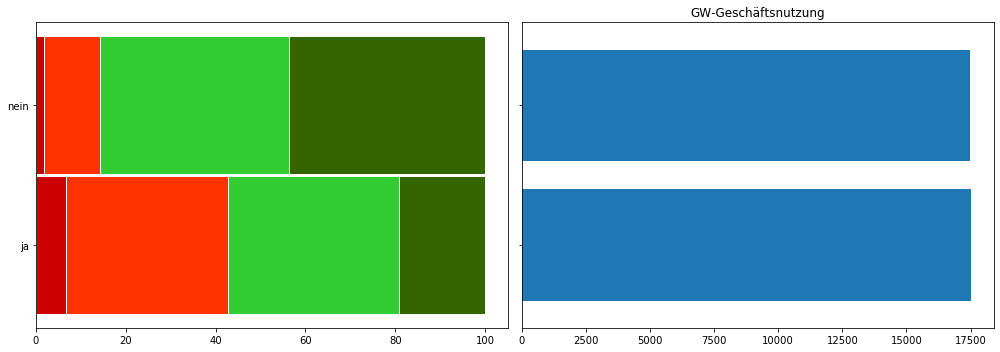

          unsafe  almost_unsafe  almost_safe       safe
group1  6.599897      36.123951    38.004337  19.271814
group2  1.740895      12.454977    42.070208  43.733920
Mittelwert von  ja - 1.69948068253153
Mittelwert von  nein - 2.2779715282145103
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -25.394998950509507
Ist der Unterschied signifikant? True
sicher Gruppe 1  53.24430748159562 sicher Gruppe2 83.36287233434338


In [9]:
df = bike_data["cp"]
df = df[(df["Häuserfront"] == "normal")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Geschäftsnutzung"] == "ja")] [["rating", "sessionID"]]
group2 = df[(df["GW-Geschäftsnutzung"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Geschäftsnutzung", ["ja", "nein"])
group_comparison(group1,group2)

#### c1.1) Einflussfaktor  "Auslage / Fußgängeraufkommen" <br> nur schmaler Gehweg,
Gruppe1: mit Auslagen <br>
Gruppe2: ohne Auslagen

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

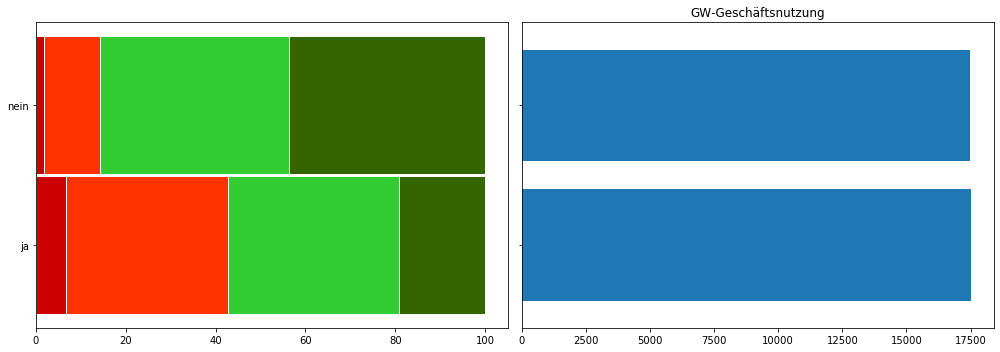

          unsafe  almost_unsafe  almost_safe       safe
group1  6.599897      36.123951    38.004337  19.271814
group2  1.740895      12.454977    42.070208  43.733920
Mittelwert von  ja - 1.69948068253153
Mittelwert von  nein - 2.2779715282145103
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -25.394998950509507
Ist der Unterschied signifikant? True
sicher Gruppe 1  53.24430748159562 sicher Gruppe2 83.36287233434338


In [10]:
df = bike_data["cp"]
df = df[(df["GW-Breite"] == "schmal")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Geschäftsnutzung"] == "ja")] [["rating", "sessionID"]]
group2 = df[(df["GW-Geschäftsnutzung"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Geschäftsnutzung", ["ja", "nein"])
group_comparison(group1,group2)

#### c1.2) Einflussfaktor  "Auslage / Fußgängeraufkommen" <br> nur breiter Gehweg,
Gruppe1: mit Auslagen <br>
Gruppe2: ohne Auslagen

Ergebnisse für Gesamtgruppe


c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:88: RuntimeWarning: invalid value encountered in true_divide
  unsafe_bars = np.array([group1[group1 == 0].shape[0], group2[group2 == 0].shape[0]])/totals * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:89: RuntimeWarning: invalid value encountered in true_divide
  unsafe_bars = unsafe_bars + np.array([group1[group1 == 0.5].shape[0], group2[group2 == 0.5].shape[0]])/(2* totals) * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:90: RuntimeWarning: invalid value encountered in true_divide
  almost_unsafe_bars = np.array([group1[group1 == 1].shape[0], group2[group2 == 1].shape[0]])/totals * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:91: RuntimeWarning: invalid value encountered in true_divide
  almost_unsafe_bars = almost_unsafe_bars + np.array([group1[group1 == 0.5].shape[0], group2[group2 == 0.5].shape[0]])/(2* totals) * 100
c:\users\nb\jupyt

<Figure size 432x288 with 0 Axes>

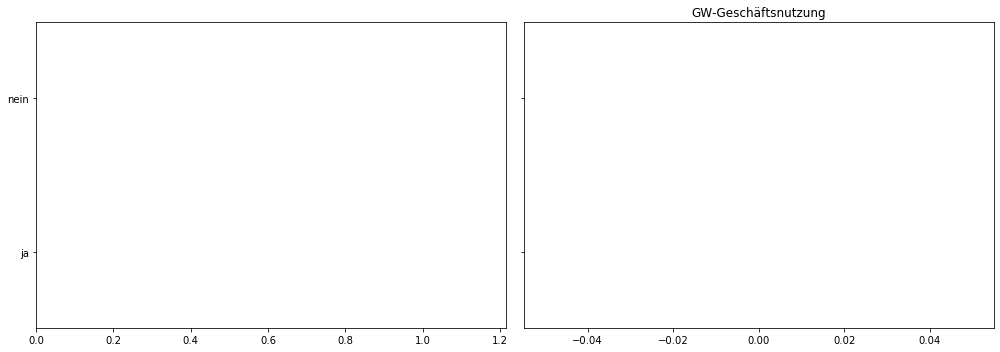

        unsafe  almost_unsafe  almost_safe  safe
group1     NaN            NaN          NaN   NaN
group2     NaN            NaN          NaN   NaN
Mittelwert von  ja - nan
Mittelwert von  nein - nan
Bootstrap Ergebnis: nan    (nan, nan)
Unterschied im Mittelwert von ja zu nein (in Prozent) nan
Ist der Unterschied signifikant? False
sicher Gruppe 1  0.0 sicher Gruppe2 0.0


C:\Users\NB\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
C:\Users\NB\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\NB\Anaconda3\lib\site-packages\bootstrapped\bootstrap.py:67: RuntimeWarning: invalid value encountered in sign
  return _np.sign(self.upper_bound) == _np.sign(self.lower_bound)


In [11]:
df = bike_data["cp"]
df = df[(df["GW-Breite"] == "breit")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Geschäftsnutzung"] == "ja")] [["rating", "sessionID"]]
group2 = df[(df["GW-Geschäftsnutzung"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Geschäftsnutzung", ["ja", "nein"])
group_comparison(group1,group2)

### e) Einflussfaktor "Trennung rechts"
Gruppe 1: mit Trennung<br>
Gruppe 2: ohne Trennung

<Figure size 432x288 with 0 Axes>

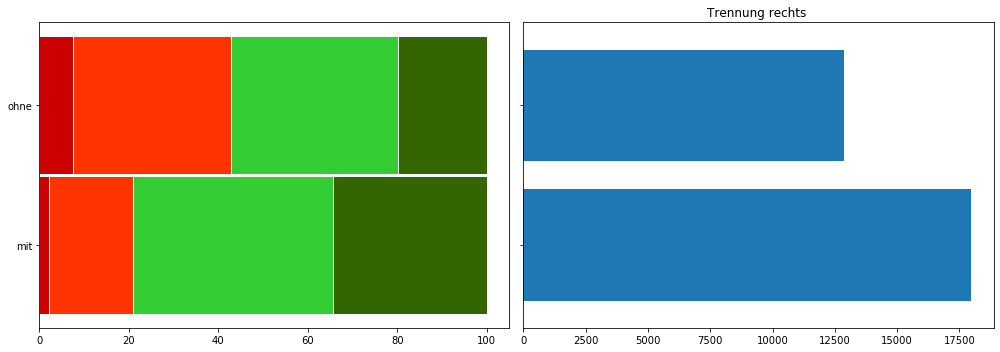

          unsafe  almost_unsafe  almost_safe       safe
group1  2.252879      18.648829    44.846192  34.252100
group2  7.511847      35.422978    37.209664  19.855512
Mittelwert von  mit - 2.1109751348945873
Mittelwert von  ohne - 1.6940884020818767
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von mit zu ohne (in Prozent) 24.608322228072375
Ist der Unterschied signifikant? True
sicher Gruppe 1  75.90254213717526 sicher Gruppe2 54.167637691291844


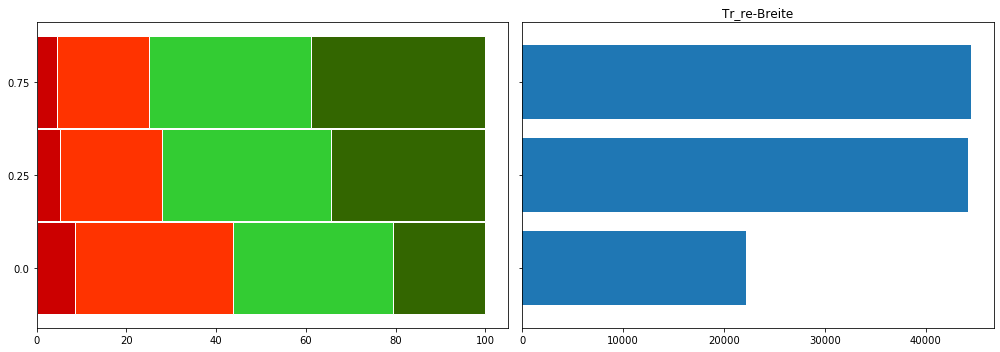

        unsafe  almost_unsafe  almost_safe       safe
0.00  8.617505      35.028605    35.731339  20.622551
0.25  5.118929      22.883694    37.654879  34.342498
0.75  4.541573      20.469663    36.150562  38.838202


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [3]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

group1 = df[(df["Tr_re-Breite"] != 0)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Breite"] == 0)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts ", ["mit", "ohne"])
group_comparison(group1,group2)

likert_plot (df[["Tr_re-Breite","rating"]])
likert_plot

##### e1.1) Einflussfaktor "Trennung rechts" - Art
Gruppe1: Trennung Grünstreifen <br>
Gruppe2: Trennung Aufpflaster

<Figure size 432x288 with 0 Axes>

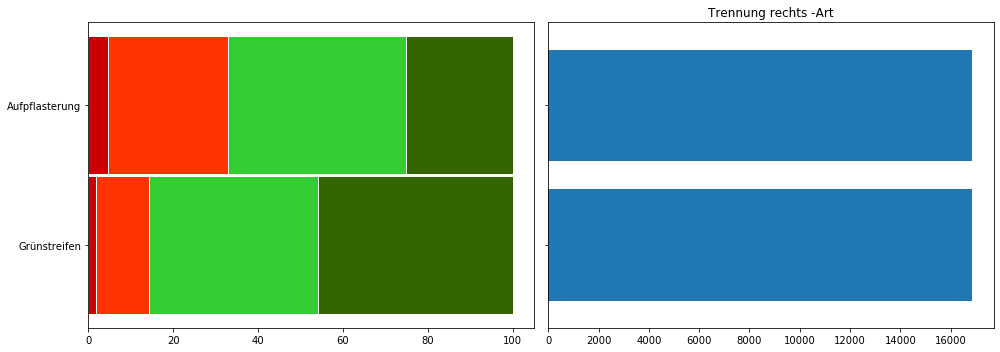

          unsafe  almost_unsafe  almost_safe       safe
group1  1.817642      12.402732    39.803980  45.975646
group2  4.615293      28.350240    41.860948  25.173518
Mittelwert von  Grünstreifen - 2.2993762993762994
Mittelwert von  Aufpflasterung - 1.8759269146348698
Bootstrap Ergebnis: 25.0    (25.0, 50.0)
Unterschied im Mittelwert von Grünstreifen zu Aufpflasterung (in Prozent) 22.572808217523214
Ist der Unterschied signifikant? True
sicher Gruppe 1  83.06504306504307 sicher Gruppe2 63.09544996144035


In [13]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

group1 = df[(df["Tr_re-Art"] == "Grünstreifen")] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "Aufpflasterung")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts -Art", ["Grünstreifen", "Aufpflasterung"])
group_comparison(group1,group2)

##### e1.2) Einflussfaktor "Trennung rechts" - Art <br> nur breite Trennung
Gruppe1: Trennung Grünstreifen <br>
Gruppe2: Trennung Aufpflaster

<Figure size 432x288 with 0 Axes>

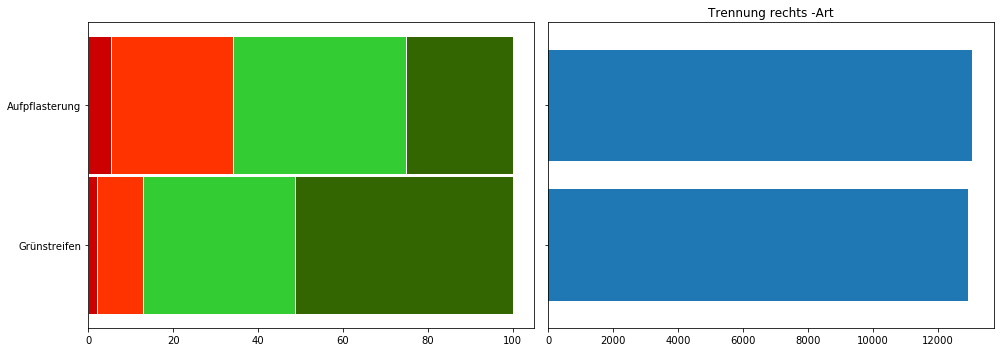

          unsafe  almost_unsafe  almost_safe       safe
group1  1.970729      10.933870    35.689949  51.405451
group2  5.249444      28.814469    40.803893  25.132194
Mittelwert von  Grünstreifen - 2.3653012234783954
Mittelwert von  Aufpflasterung - 1.8581883669246686
Bootstrap Ergebnis: 25.0    (25.0, 25.0)
Unterschied im Mittelwert von Grünstreifen zu Aufpflasterung (in Prozent) 27.290713125763816
Ist der Unterschied signifikant? True
sicher Gruppe 1  85.488617004801 sicher Gruppe2 62.86305464020231


In [14]:
df = bike_data["cp"]
df = df[(df["Tr_re-Breite"] == 0.75)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

group1 = df[(df["Tr_re-Art"] == "Grünstreifen")] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "Aufpflasterung")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts -Art", ["Grünstreifen", "Aufpflasterung"])
group_comparison(group1,group2)

##### e1.3) Einflussfaktor "Trennung rechts" - Art <br> nur schmale Trennung
Gruppe1: Trennung Grünstreifen <br>
Gruppe2: Trennung Aufpflaster

<Figure size 432x288 with 0 Axes>

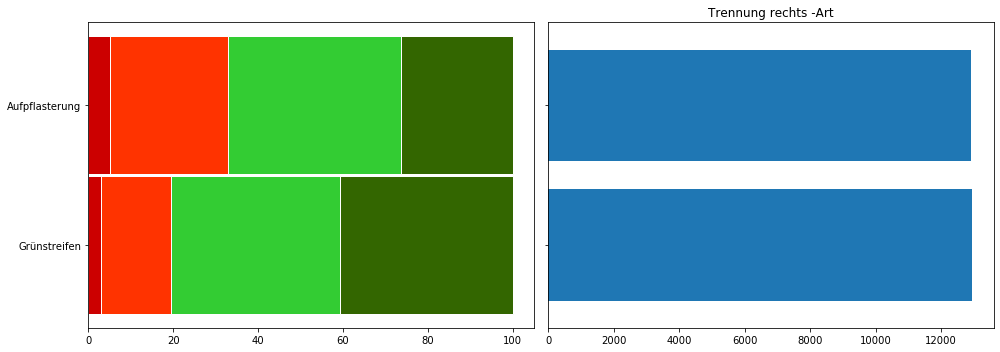

          unsafe  almost_unsafe  almost_safe       safe
group1  2.907560      16.603599    39.771411  40.717430
group2  5.169472      27.840689    40.657721  26.332118
Mittelwert von  Grünstreifen - 2.1829871032512163
Mittelwert von  Aufpflasterung - 1.881524858450322
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Grünstreifen zu Aufpflasterung (in Prozent) 16.022230237722574
Ist der Unterschied signifikant? True
sicher Gruppe 1  78.17592092053441 sicher Gruppe2 63.941673776467844


In [15]:
df = bike_data["cp"]
df = df[(df["Tr_re-Breite"] == 0.25)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

group1 = df[(df["Tr_re-Art"] == "Grünstreifen")] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "Aufpflasterung")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts -Art", ["Grünstreifen", "Aufpflasterung"])
group_comparison(group1,group2)

##### e1.4) Einflussfaktor "Trennung rechts" - Art <br> nur schmale Trennung
Gruppe1: Trennung Grünstreifen <br>
Gruppe2: Trennung keine Trennung

<Figure size 432x288 with 0 Axes>

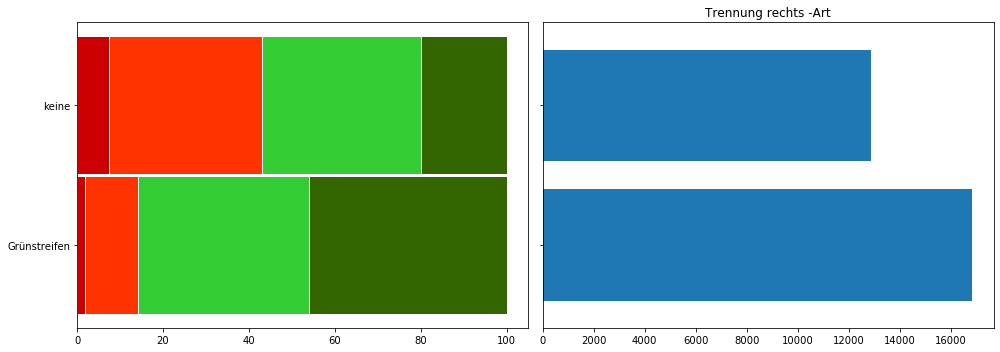

          unsafe  almost_unsafe  almost_safe       safe
group1  1.817642      12.402732    39.803980  45.975646
group2  7.511847      35.422978    37.209664  19.855512
Mittelwert von  Grünstreifen - 2.2993762993762994
Mittelwert von  keine - 1.6940884020818767
Bootstrap Ergebnis: 25.0    (25.0, 50.0)
Unterschied im Mittelwert von Grünstreifen zu keine (in Prozent) 35.72941627783888
Ist der Unterschied signifikant? True
sicher Gruppe 1  83.06504306504307 sicher Gruppe2 54.167637691291844


In [16]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

group1 = df[(df["Tr_re-Art"] == "Grünstreifen")] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts -Art", ["Grünstreifen", "keine"])
group_comparison(group1,group2)

##### e2.1) Einflussfaktor "Trennung rechts"  <br> bei schmaler RVA und schmalem Gehweg mit Auslage
Gruppe1: Trennung Grünstreifen schmal <br>
Gruppe2: Trennung Grünstreifen breit <br>
Gruppe3: Trennung keine Trennung

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

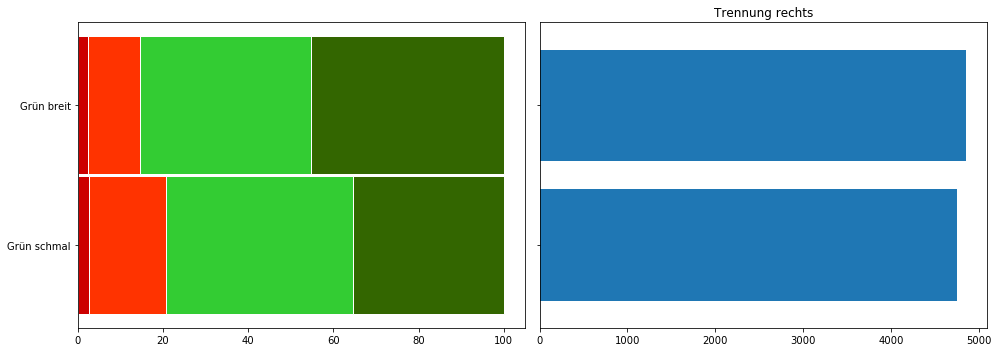

          unsafe  almost_unsafe  almost_safe       safe
group1  2.653749      18.070767    43.944819  35.330666
group2  2.373091      12.329757    40.063970  45.233182
Mittelwert von  Grün schmal - 2.1195240101095196
Mittelwert von  Grün breit - 2.2815724308708214
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Grün schmal zu Grün breit (in Prozent) -7.102488554327937
Ist der Unterschied signifikant? True
sicher Gruppe 1  78.68576242628474 sicher Gruppe2 84.81221626083368


<Figure size 432x288 with 0 Axes>

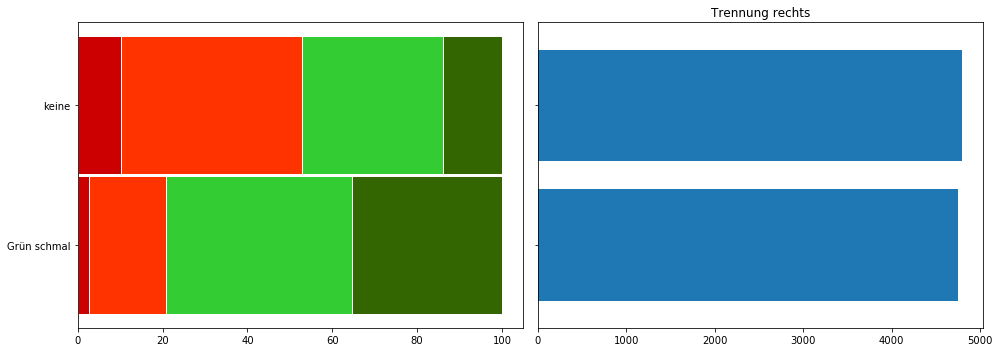

           unsafe  almost_unsafe  almost_safe       safe
group1   2.653749      18.070767    43.944819  35.330666
group2  10.135558      42.752868    33.065693  14.045881
Mittelwert von  Grün schmal - 2.1195240101095196
Mittelwert von  keine - 1.5102189781021897
Bootstrap Ergebnis: 100.0    (100.0, 100.0)
Unterschied im Mittelwert von Grün schmal zu keine (in Prozent) 40.34547577815572
Ist der Unterschied signifikant? True
sicher Gruppe 1  78.68576242628474 sicher Gruppe2 46.19395203336809


<Figure size 432x288 with 0 Axes>

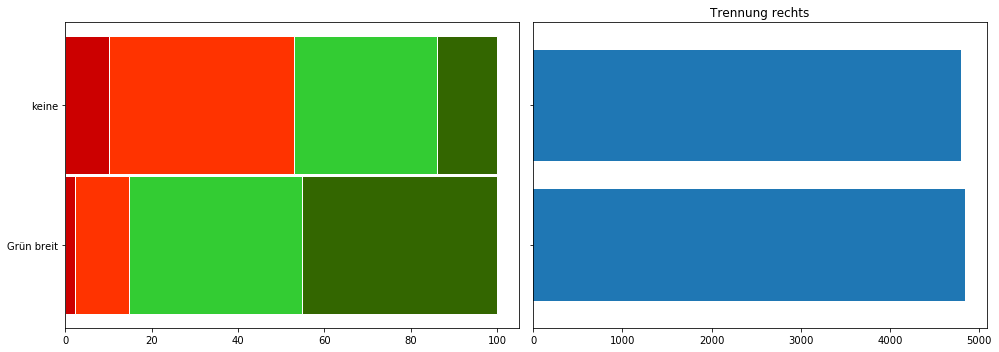

           unsafe  almost_unsafe  almost_safe       safe
group1   2.373091      12.329757    40.063970  45.233182
group2  10.135558      42.752868    33.065693  14.045881
Mittelwert von  Grün breit - 2.2815724308708214
Mittelwert von  keine - 1.5102189781021897
Bootstrap Ergebnis: 100.0    (100.0, 100.0)
Unterschied im Mittelwert von Grün breit zu keine (in Prozent) 51.07560320410949
Ist der Unterschied signifikant? True
sicher Gruppe 1  84.81221626083368 sicher Gruppe2 46.19395203336809


In [17]:
df = bike_data["cp"]
df = df[(df["GW-Breite"] == "schmal") & (df["GW-Geschäftsnutzung"] == "ja") & (df["RVA-Breite"] == 2.0)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.75)] [["rating", "sessionID"]]
group3 = df[(df["Tr_re-Art"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts", ["Grün schmal", "Grün breit"])
group_comparison(group1,group2)

test_hypothesis(group1, group3, "Trennung rechts", ["Grün schmal", "keine"])
group_comparison(group1,group3)

test_hypothesis(group2, group3, "Trennung rechts", ["Grün breit", "keine"])
group_comparison(group2,group3)

##### e2.2) Einflussfaktor "Trennung rechts"  <br> bei breiter RVA und schmalem Gehweg mit Auslage
Gruppe1: Trennung Grünstreifen schmal <br>
Gruppe2: Trennung Grünstreifen breit <br>
Gruppe3: Trennung keine Trennung

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

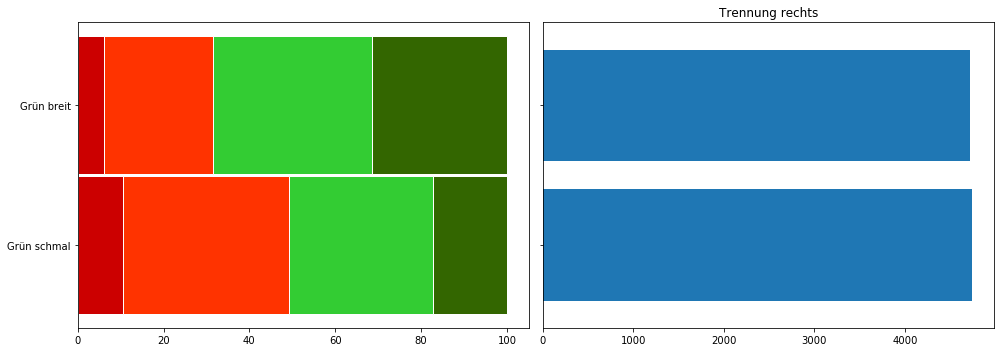

           unsafe  almost_unsafe  almost_safe       safe
group1  10.649515      38.654576    33.340363  17.355546
group2   6.173101      25.307594    37.144675  31.374629
Mittelwert von  Grün schmal - 1.5740194010965838
Mittelwert von  Grün breit - 1.9372083156554942
Bootstrap Ergebnis: 0.0    (0.0, 50.0)
Unterschied im Mittelwert von Grün schmal zu Grün breit (in Prozent) -18.748056758987122
Ist der Unterschied signifikant? False
sicher Gruppe 1  50.08435259384226 sicher Gruppe2 67.96775562155283


<Figure size 432x288 with 0 Axes>

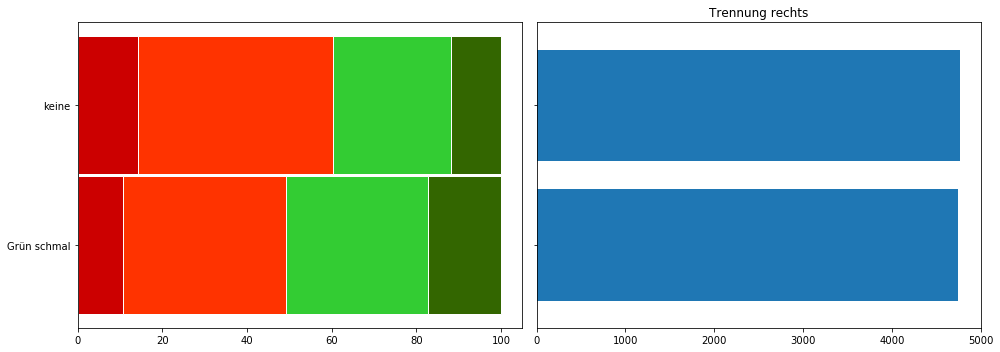

           unsafe  almost_unsafe  almost_safe       safe
group1  10.649515      38.654576    33.340363  17.355546
group2  14.257239      46.097356    27.864037  11.781368
Mittelwert von  Grün schmal - 1.5740194010965838
Mittelwert von  keine - 1.3716953420058748
Bootstrap Ergebnis: 100.0    (100.0, 200.0)
Unterschied im Mittelwert von Grün schmal zu keine (in Prozent) 14.74992681646377
Ist der Unterschied signifikant? True
sicher Gruppe 1  50.08435259384226 sicher Gruppe2 39.02643726395301


<Figure size 432x288 with 0 Axes>

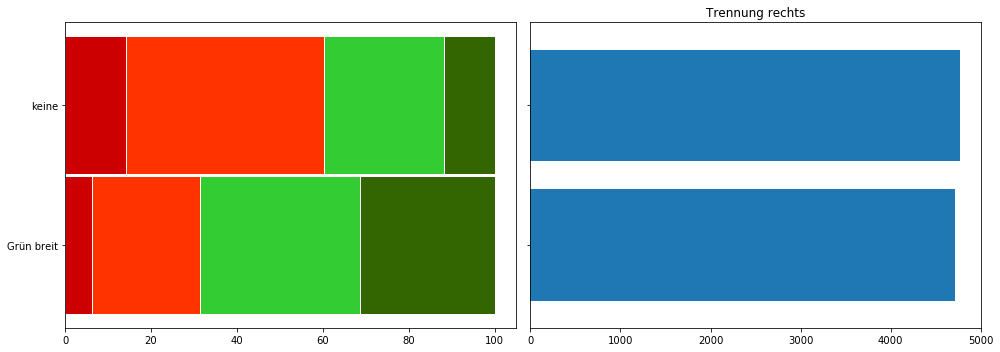

           unsafe  almost_unsafe  almost_safe       safe
group1   6.173101      25.307594    37.144675  31.374629
group2  14.257239      46.097356    27.864037  11.781368
Mittelwert von  Grün breit - 1.9372083156554942
Mittelwert von  keine - 1.3716953420058748
Bootstrap Ergebnis: 100.0    (100.0, 100.0)
Unterschied im Mittelwert von Grün breit zu keine (in Prozent) 41.22730145184071
Ist der Unterschied signifikant? True
sicher Gruppe 1  67.96775562155283 sicher Gruppe2 39.02643726395301


In [18]:
df = bike_data["cp"]
df = df[(df["GW-Breite"] == "schmal") & (df["GW-Geschäftsnutzung"] == "ja") & (df["RVA-Breite"] == 3.5)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.75)] [["rating", "sessionID"]]
group3 = df[(df["Tr_re-Art"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts", ["Grün schmal", "Grün breit"])
group_comparison(group1,group2)

test_hypothesis(group1, group3, "Trennung rechts", ["Grün schmal", "keine"])
group_comparison(group1,group3)

test_hypothesis(group2, group3, "Trennung rechts", ["Grün breit", "keine"])
group_comparison(group2,group3)

##### e3.1) Einflussfaktor "Trennung rechts"  <br> bei schmaler RVA und schmalem Gehweg ohne Auslage
Gruppe1: Trennung Grünstreifen schmal <br>
Gruppe2: Trennung Grünstreifen breit <br>
Gruppe3: Trennung keine Trennung <br>
Gruppe4: Trennun Grünstreifen schmal+breit

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

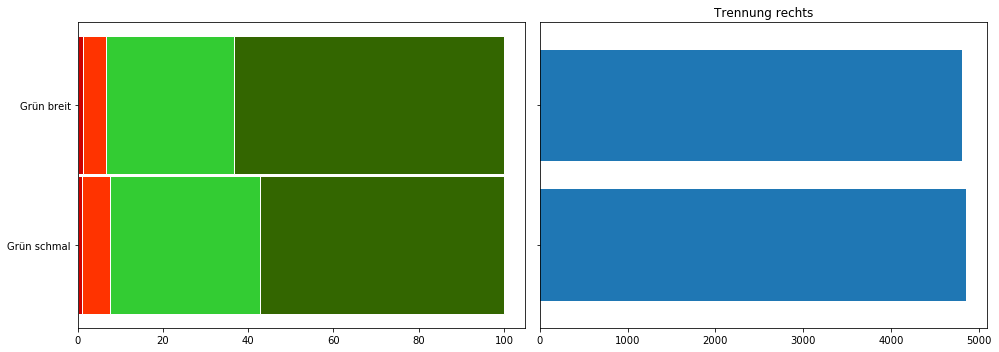

          unsafe  almost_unsafe  almost_safe       safe
group1  1.041237       6.515464    35.298969  57.144330
group2  1.268719       5.355657    30.126872  63.248752
Mittelwert von  Grün schmal - 2.4854639175257733
Mittelwert von  Grün breit - 2.553556572379368
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Grün schmal zu Grün breit (in Prozent) -2.666581018416472
Ist der Unterschied signifikant? True
sicher Gruppe 1  92.18556701030927 sicher Gruppe2 93.13643926788686


<Figure size 432x288 with 0 Axes>

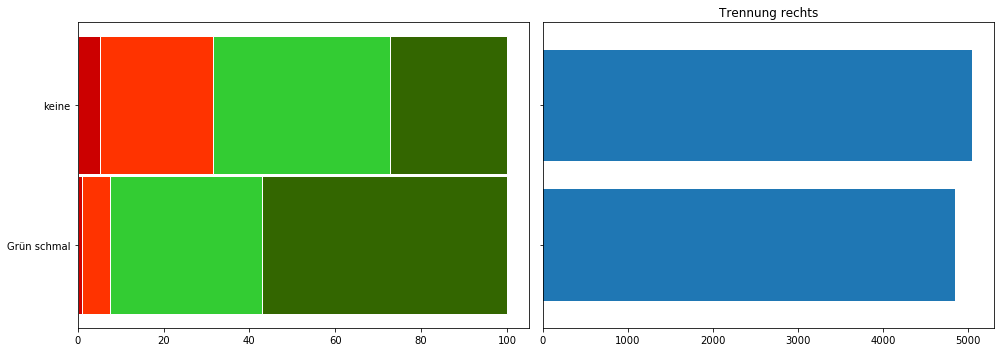

          unsafe  almost_unsafe  almost_safe       safe
group1  1.041237       6.515464    35.298969  57.144330
group2  5.258467      26.203209    41.196276  27.342048
Mittelwert von  Grün schmal - 2.4854639175257733
Mittelwert von  keine - 1.9062190532778769
Bootstrap Ergebnis: 50.0    (50.0, 50.0)
Unterschied im Mittelwert von Grün schmal zu keine (in Prozent) 30.3871091442426
Ist der Unterschied signifikant? True
sicher Gruppe 1  92.18556701030927 sicher Gruppe2 67.73618538324422


<Figure size 432x288 with 0 Axes>

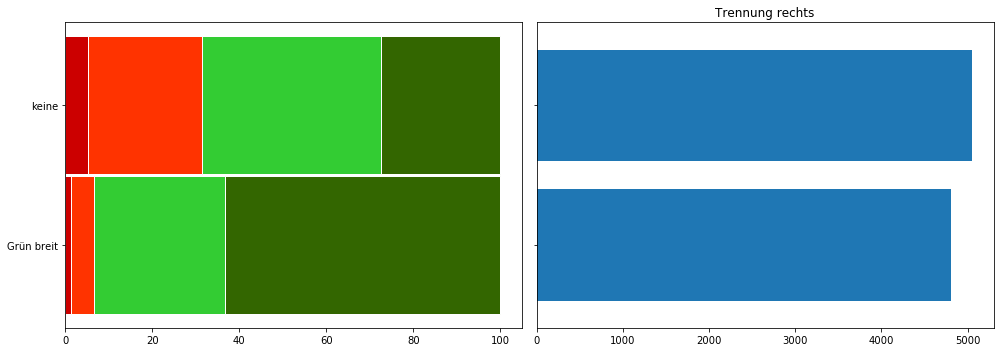

          unsafe  almost_unsafe  almost_safe       safe
group1  1.268719       5.355657    30.126872  63.248752
group2  5.258467      26.203209    41.196276  27.342048
Mittelwert von  Grün breit - 2.553556572379368
Mittelwert von  keine - 1.9062190532778769
Bootstrap Ergebnis: 50.0    (50.0, 50.0)
Unterschied im Mittelwert von Grün breit zu keine (in Prozent) 33.95924083270225
Ist der Unterschied signifikant? True
sicher Gruppe 1  93.13643926788686 sicher Gruppe2 67.73618538324422


<Figure size 432x288 with 0 Axes>

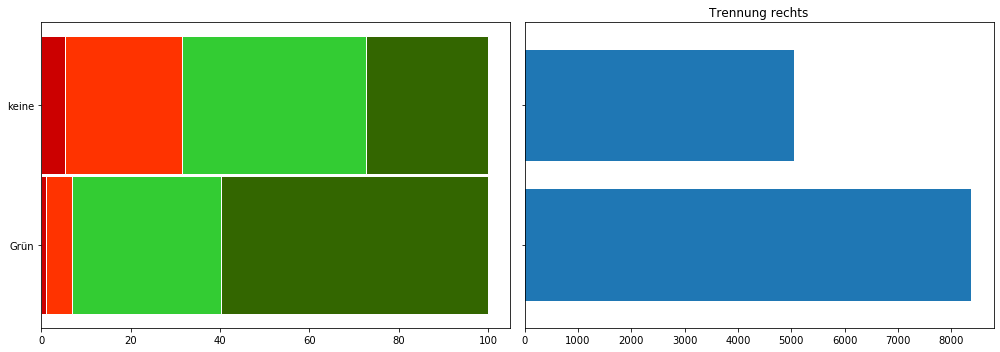

          unsafe  almost_unsafe  almost_safe       safe
group1  1.116151       5.759819    33.257729  59.866301
group2  5.258467      26.203209    41.196276  27.342048
Mittelwert von  Grün - 2.5187417930046556
Mittelwert von  keine - 1.9062190532778769
Bootstrap Ergebnis: 50.0    (50.0, 50.0)
Unterschied im Mittelwert von Grün zu keine (in Prozent) 32.132862100685806
Ist der Unterschied signifikant? True
sicher Gruppe 1  92.59878238032708 sicher Gruppe2 67.73618538324422


In [5]:
df = bike_data["cp"]
df = df[(df["GW-Breite"] == "schmal") & (df["GW-Geschäftsnutzung"] != "ja") & (df["RVA-Breite"] == 2.0)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.75)] [["rating", "sessionID"]]
group3 = df[(df["Tr_re-Art"] == "-")] [["rating", "sessionID"]]
group4 = df[(df["Tr_re-Art"] == "Grünstreifen")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts", ["Grün schmal", "Grün breit"])
group_comparison(group1,group2)

test_hypothesis(group1, group3, "Trennung rechts", ["Grün schmal", "keine"])
group_comparison(group1,group3)

test_hypothesis(group2, group3, "Trennung rechts", ["Grün breit", "keine"])
group_comparison(group2,group3)

test_hypothesis(group4, group3, "Trennung rechts", ["Grün", "keine"])
group_comparison(group4,group3)

##### e3.1) Einflussfaktor "Trennung rechts"  <br> bei breiter RVA und schmalem Gehweg ohne Auslage
Gruppe1: Trennung Grünstreifen schmal <br>
Gruppe2: Trennung Grünstreifen breit <br>
Gruppe3: Trennung keine Trennung

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

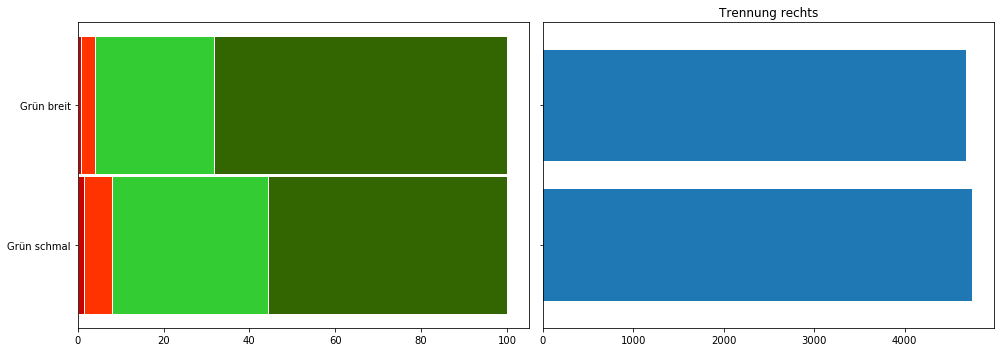

          unsafe  almost_unsafe  almost_safe       safe
group1  1.370152       6.566189    36.351180  55.712479
group2  0.758385       3.215125    27.857295  68.169195
Mittelwert von  Grün schmal - 2.4640598650927488
Mittelwert von  Grün breit - 2.634372997222816
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Grün schmal zu Grün breit (in Prozent) -6.465034841672495
Ist der Unterschied signifikant? True
sicher Gruppe 1  91.77908937605397 sicher Gruppe2 95.87694936979278


<Figure size 432x288 with 0 Axes>

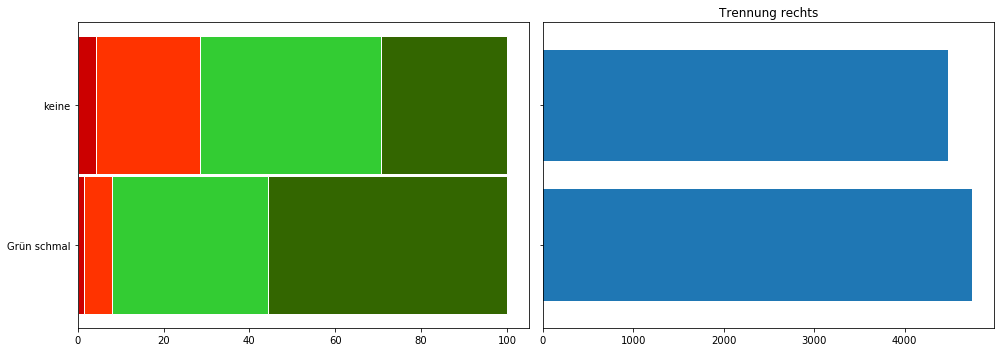

          unsafe  almost_unsafe  almost_safe       safe
group1  1.370152       6.566189    36.351180  55.712479
group2  4.285714      24.229911    42.042411  29.441964
Mittelwert von  Grün schmal - 2.4640598650927488
Mittelwert von  keine - 1.96640625
Bootstrap Ergebnis: 50.0    (50.0, 50.0)
Unterschied im Mittelwert von Grün schmal zu keine (in Prozent) 25.3077722415065
Ist der Unterschied signifikant? True
sicher Gruppe 1  91.77908937605397 sicher Gruppe2 71.00446428571428


<Figure size 432x288 with 0 Axes>

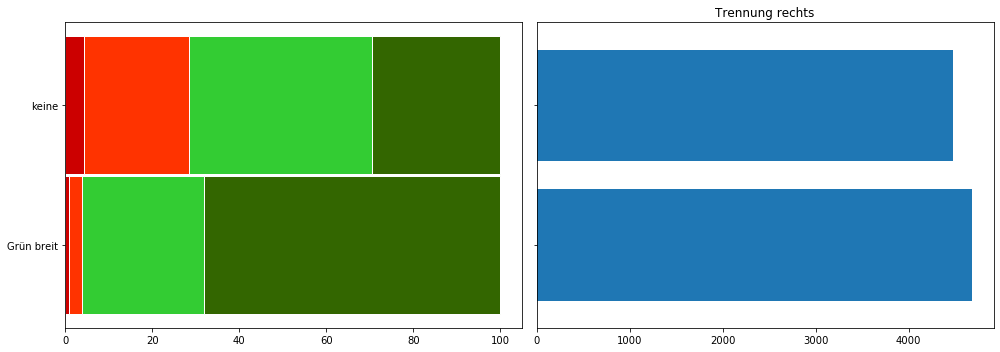

          unsafe  almost_unsafe  almost_safe       safe
group1  0.758385       3.215125    27.857295  68.169195
group2  4.285714      24.229911    42.042411  29.441964
Mittelwert von  Grün breit - 2.634372997222816
Mittelwert von  keine - 1.96640625
Bootstrap Ergebnis: 50.0    (50.0, 50.0)
Unterschied im Mittelwert von Grün breit zu keine (in Prozent) 33.96890887744158
Ist der Unterschied signifikant? True
sicher Gruppe 1  95.87694936979278 sicher Gruppe2 71.00446428571428


In [20]:
df = bike_data["cp"]
df = df[(df["GW-Breite"] == "schmal") & (df["GW-Geschäftsnutzung"] != "ja") & (df["RVA-Breite"] == 3.5)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.75)] [["rating", "sessionID"]]
group3 = df[(df["Tr_re-Art"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts", ["Grün schmal", "Grün breit"])
group_comparison(group1,group2)

test_hypothesis(group1, group3, "Trennung rechts", ["Grün schmal", "keine"])
group_comparison(group1,group3)

test_hypothesis(group2, group3, "Trennung rechts", ["Grün breit", "keine"])
group_comparison(group2,group3)

### f) Einflussfaktor "Trennung links"
Gruppe1: Trennung schmal <br>
Gruppe2: Trennung breit

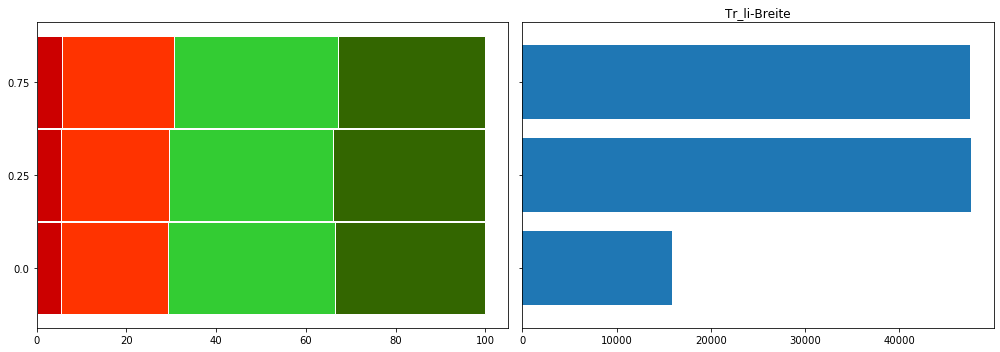

        unsafe  almost_unsafe  almost_safe       safe
0.00  5.481612      23.825144    37.103387  33.589857
0.25  5.455424      23.968574    36.671288  33.904714
0.75  5.755214      24.897830    36.515694  32.831262


In [21]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["Tr_li-Breite","rating"]])

### g) Einflussfaktor "Trennung links - baulich"
Gruppe1: mit baulicher Trennung <br>
Gruppe2: ohne bauliche Trennung

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

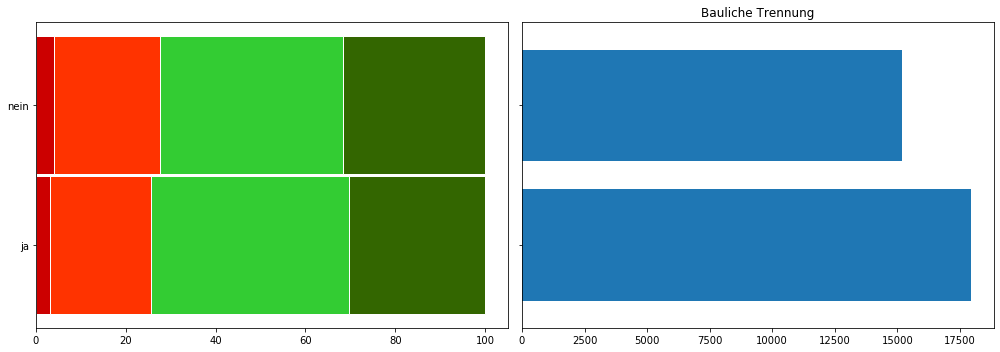

          unsafe  almost_unsafe  almost_safe       safe
group1  3.025744      22.634570    44.098964  30.240722
group2  3.911755      23.717484    40.675008  31.695752
Mittelwert von  ja - 2.0155466399197595
Mittelwert von  nein - 2.001547579848535
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) 0.6994118057530213
Ist der Unterschied signifikant? True
sicher Gruppe 1  70.44466733533935 sicher Gruppe2 68.5018109976951


In [22]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li_baulTrennung"] == "-")] [["rating", "sessionID"]]
group2 = df[(df["Tr_li_baulTrennung"] == "Sperrpfosten")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Bauliche Trennung", ["ja", "nein"])
group_comparison(group1,group2)

#### g1) Einflussfaktor  "Trennung links - baulich" <br> nur mit fließendem Verkehr
Gruppe1: mit Auslagen <br>
Gruppe2: ohne Auslagen


Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

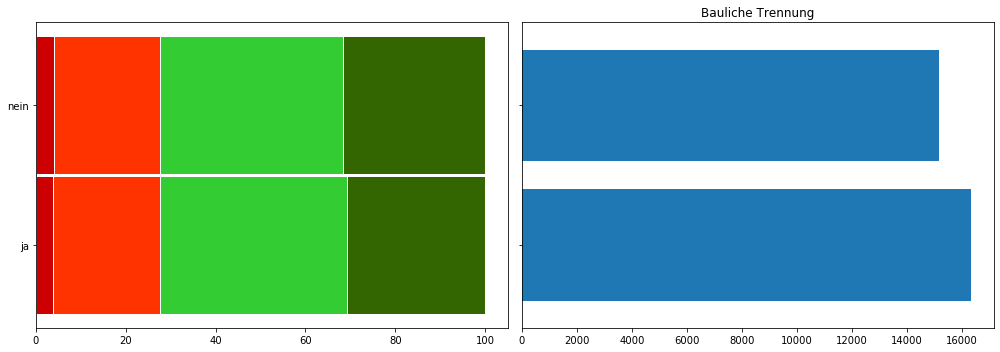

          unsafe  almost_unsafe  almost_safe       safe
group1  3.865916      23.663445    41.766577  30.704062
group2  3.911755      23.717484    40.675008  31.695752
Mittelwert von  ja - 1.9930878394910692
Mittelwert von  nein - 2.001547579848535
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -0.422659967848776
Ist der Unterschied signifikant? True
sicher Gruppe 1  68.37533643259115 sicher Gruppe2 68.5018109976951


In [23]:
df = bike_data["cp"]
df = df[(df["Links_RVA"] == "Fahrstreifen")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li_baulTrennung"] == "-")] [["rating", "sessionID"]]
group2 = df[(df["Tr_li_baulTrennung"] == "Sperrpfosten")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Bauliche Trennung", ["ja", "nein"])
group_comparison(group1,group2)

#### g2) Einflussfaktor  "Trennung links - baulich" <br> nur Parken
Gruppe1: mit Auslagen <br>
Gruppe2: ohne Auslagen

Ergebnisse für Gesamtgruppe


c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:88: RuntimeWarning: invalid value encountered in true_divide
  unsafe_bars = np.array([group1[group1 == 0].shape[0], group2[group2 == 0].shape[0]])/totals * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:89: RuntimeWarning: invalid value encountered in true_divide
  unsafe_bars = unsafe_bars + np.array([group1[group1 == 0.5].shape[0], group2[group2 == 0.5].shape[0]])/(2* totals) * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:90: RuntimeWarning: invalid value encountered in true_divide
  almost_unsafe_bars = np.array([group1[group1 == 1].shape[0], group2[group2 == 1].shape[0]])/totals * 100
c:\users\nb\jupyter_projekte\umfrage\src\visualization\visualize.py:91: RuntimeWarning: invalid value encountered in true_divide
  almost_unsafe_bars = almost_unsafe_bars + np.array([group1[group1 == 0.5].shape[0], group2[group2 == 0.5].shape[0]])/(2* totals) * 100
c:\users\nb\jupyt

<Figure size 432x288 with 0 Axes>

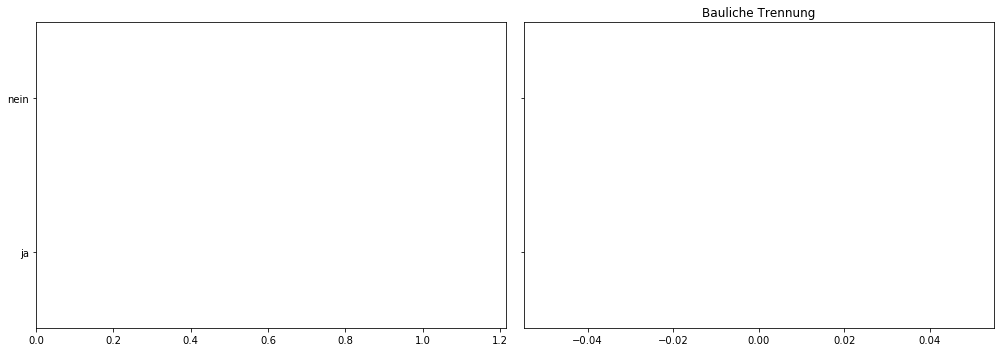

        unsafe  almost_unsafe  almost_safe  safe
group1     NaN            NaN          NaN   NaN
group2     NaN            NaN          NaN   NaN
Mittelwert von  ja - nan
Mittelwert von  nein - nan
Bootstrap Ergebnis: nan    (nan, nan)
Unterschied im Mittelwert von ja zu nein (in Prozent) nan
Ist der Unterschied signifikant? False
sicher Gruppe 1  0.0 sicher Gruppe2 0.0


C:\Users\NB\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
C:\Users\NB\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\NB\Anaconda3\lib\site-packages\bootstrapped\bootstrap.py:67: RuntimeWarning: invalid value encountered in sign
  return _np.sign(self.upper_bound) == _np.sign(self.lower_bound)


In [24]:
df = bike_data["cp"]
df = df[(df["Links_RVA"] == "Parken")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li_baulTrennung"] == "-")] [["rating", "sessionID"]]
group2 = df[(df["Tr_li_baulTrennung"] == "Sperrpfosten")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Bauliche Trennung", ["ja", "nein"])
group_comparison(group1,group2)

### h) Einflussfaktor "Links RVA"


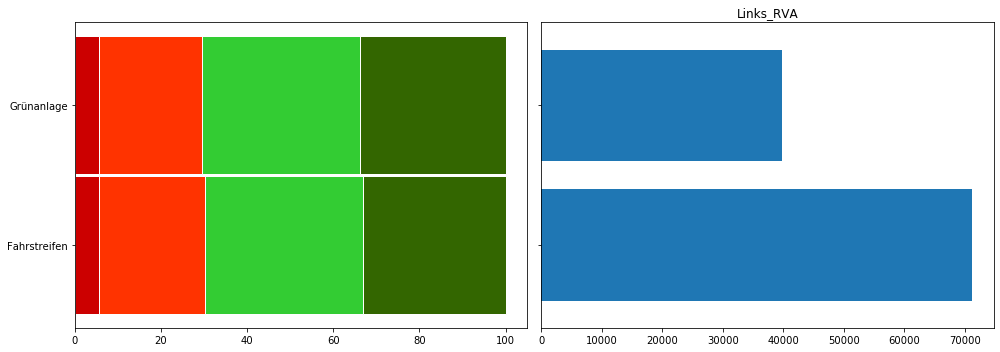

                unsafe  almost_unsafe  almost_safe       safe
Fahrstreifen  5.605980      24.503330    36.708630  33.182061
Grünanlage    5.554298      24.063593    36.590949  33.791160


In [25]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["Links_RVA","rating"]])

In [26]:
### h) Einflussfaktor "Rechts RVA"

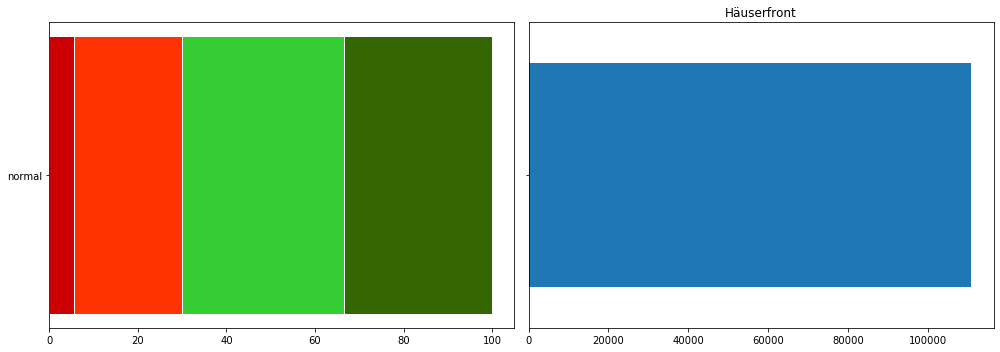

          unsafe  almost_unsafe  almost_safe       safe
normal  5.587458      24.345741    36.666456  33.400344


In [27]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["Häuserfront","rating"]])